# <center> Clusterização </center>

https://www.youtube.com/watch?v=p2twwtegYkU

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [59]:
def fillMissingData(X, column):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')     
    ## em strategy colocar o criterio estatístico a fazer a substituição de variável
    X[:,column:column + 1] = imputer.fit_transform(X[:,column:column + 1])
    return X

## 1. Banco de dados

### 1.1 Leitura banco de dados

In [60]:
df = pd.read_excel('BancoDeDados.xlsx')

df.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0


### 1.2 Descrição das variáveis conjunto de dados

In [61]:
df.describe()

,Inscritos,Visualizações
count,4.600000e+01,4.600000e+01
mean,1.537118e+05,1.025442e+07
std,2.763771e+05,2.434814e+07
min,2.308000e+03,1.615000e+04
25%,1.349375e+04,5.472578e+05
50%,4.979700e+04,1.595976e+06
75%,1.337050e+05,5.279537e+06
max,1.423056e+06,1.187416e+08


In [62]:
df.median()

Inscritos          49797.0
Visualizações    1595976.0
dtype: float64

In [63]:
df['Visualizações'].unique()

array([4.06590000e+05, 8.68235000e+05, 2.85650800e+06, 1.50000000e+05,
       1.57545600e+06, 1.66789200e+06, 1.71361000e+05, 1.10273860e+07,
       6.22623500e+06, 3.01664570e+07, 2.50020000e+05, 7.55149100e+06,
       4.36620000e+04, 4.15154800e+06, 5.41832000e+05, 4.43120000e+04,
       1.32926800e+06, 1.82572400e+06, 9.30365170e+07, 5.02788000e+06,
       5.36342300e+06, 1.42797700e+06, 1.11133400e+06, 2.25551340e+07,
       3.37552800e+06, 6.83190000e+05, 1.21393850e+07, 1.61649600e+06,
                  nan, 2.62773350e+07, 1.69693320e+07, 8.06815000e+05,
       7.64627870e+07, 1.04217000e+05, 5.63535000e+05, 4.54032100e+06,
       8.25990000e+04, 9.16320000e+05, 2.00962100e+06, 1.18741623e+08,
       7.48018000e+05, 1.61500000e+04, 3.01326400e+06, 2.13971700e+06,
       7.46800000e+04, 4.12280000e+04, 1.00492100e+06])

### 1.3 Completando dados faltantes da planilha com a mediana da variável observada

In [64]:
df_numpy = fillMissingData(df.to_numpy(), 1)      ## O 1 representa a coluna que estou considerando, nesse caso é a coluna de inscritos
df_numpy[:, 1] = df_numpy[:, 1].astype("int")
df_numpy = fillMissingData(df_numpy, 2)
df_numpy[:, 2] = df_numpy[:, 2].astype("int")


#atualiza peixe babel
df.at[28, 'Inscritos'] = df_numpy[28][1] ## A observação 28 está vazia (nan) a ela será atribuido a mediada das observações, por esse motivo tem o 28. Lembrando que a primeira observação é zero.
df.at[28, 'Visualizações'] = df_numpy[28][2]

#converte inscritos e visualizações para inteiro
df.Inscritos = df.Inscritos.astype("int")    ## Convertendo as variáveis para tipo inteiro
df.Visualizações = df.Visualizações.astype("int")


In [42]:
df.head(5)

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438,406590
1,Terra Negra,35241,868235
2,Frank Jaava,31680,2856508
3,Dispersciência,25100,150000
4,Olá Ciência,32788,1575456


### 1.4 Deixando apenas as variáveis a ser feita a análise

In [65]:
X = pd.DataFrame({'Inscritos': df_numpy[:, 1], 'Visualizações': df_numpy[:, 2]})
X.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


## <center> Cluster Não Hierarquico - K-Means </center>

### Método da Silhueta

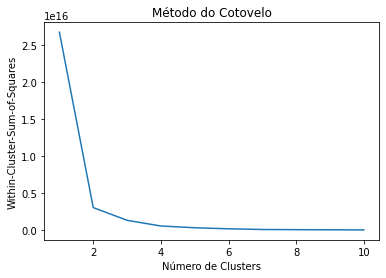

In [66]:
wcss = []
for i in range(1, 11):     ## 11 valor de K maximo pode estar considerando
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)  ## n_init = 10 quantidade de vezes que roda o K-means, quanto maior melhor, no entanto levará muito mais tempo
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

### Aparentemente considerar K=2 é o mais indicado

In [67]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

### Adição da variável que corresponde o cluster

In [68]:
df['ClusterNaoHierar'] = clusters

### Identificando os canais que tem em cada cluster

In [69]:
boolArray = df['ClusterNaoHierar'] == 1
df[boolArray]

,Canal,Inscritos,Visualizações,ClusterNaoHierar
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [70]:
boolArray = df['ClusterNaoHierar'] == 0
df[boolArray]

,Canal,Inscritos,Visualizações,ClusterNaoHierar
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
9,Minuto da Terra,274196,30166457,0


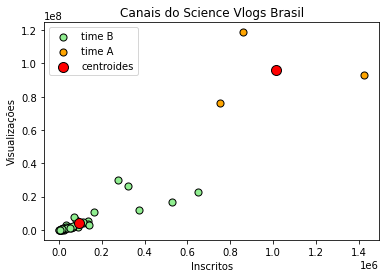

In [71]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, c='red', edgecolor='black',      ## s tamanho do centroide
    label='centroides'
)
plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

## <center> Clusterização Hierárquica </center>

https://www.youtube.com/watch?v=I-NSH_-Vm4g&t=68s

### Dendograma

Escolhe a quantidade de cluster

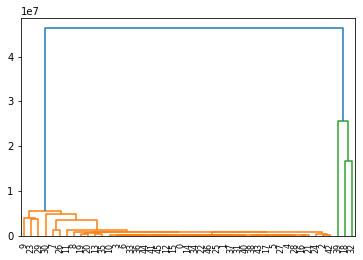

In [72]:


from scipy.cluster.hierarchy import dendrogram, linkage

#linkage realiza clusterização hierárquica a fim de se construir um dendrograma
dendrogram(linkage(x))
plt.show()

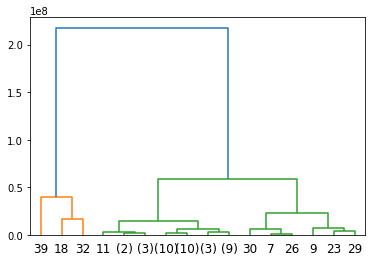

In [73]:
dendrogram(linkage(x, 'ward'), truncate_mode = 'level', p=4)   ## Truncate_mode é usado para facilitar a visualização
plt.show()

As ramificações em que o número está com parenteses é referente ao total de canais que aquela ramificação tem, dado que foi feito o truncamento para ajudar na visualização.

O corte no dendograma para saber a quantidade de clurter é aconselhável ser feito no ramo com maior distância.
Nesse caso o aconselhavál será o uso de 2 clusters,

### Algoritmo clusterização hierarquica

In [74]:

from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(affinity='euclidean', linkage='ward')  ## affinity como será computada a distância entre os clusters, o algoritmos ward so pode ser usado quando for considerada distância euclidiana
clusters = hc_model.fit_predict(x)   ## fit treina o modelo, predict retorna os clusters

df['ClusterHierarquico'] = clusters
df

,Canal,Inscritos,Visualizações,ClusterNaoHierar,ClusterHierarquico
0,Site Arqueologia Egípcia,13438,406590,0,0
1,Terra Negra,35241,868235,0,0
2,Frank Jaava,31680,2856508,0,0
3,Dispersciência,25100,150000,0,0
4,Olá Ciência,32788,1575456,0,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0,0
6,Delta T - Os super lentos,12000,171361,0,0
7,Bláblálogia,161951,11027386,0,0
8,Efarsas,78876,6226235,0,0
9,Minuto da Terra,274196,30166457,0,0


In [75]:
#È possível observar a quantidade de clusters considerado, observa-se no algoritmo anterior que não foi fornecido manualmente o valor de k

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [76]:
hc_model

AgglomerativeClustering()

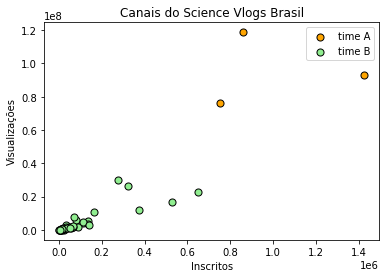

In [77]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()